In [21]:
from notebook import notebookapp as app
app.NotebookApp.iopub_data_rate_limit = 10000000.0

Retea sociala: ce fel de poze ai postat? (TEMA) Tocmai ti-ai inceput prima ta zi de munca ca si software developer la Facebook in echipa care se ocupa cu partea de continut a platformei. Echipa de analisti a observat ca foarte multe persoane folosesc filtre peste pozele lor, asadar in speranta de a promova continut mai putin editat, si poze cat mai reale, doresc sa implementeze o noua functionalite in care sa arate utilizatorilor daca o poza a fost sau nu editata. Pentru a testa aceasta idee, si pentru a vedea daca utlizatorilor li s-ar parea folositoare o astfel de functionalitate, au decis sa testeze ideea pe pozele care au filtre sepia. Primul task al tau este sa implementezi un algoritm de clasificare a pozelor care sa ne spuna daca o poza are sau nu adaugat filtru sepia. Team leaderul echipei de ML iti propune urmatorul plan de lucru

 1. devoltarea, antrenarea si testarea unui clasificator bazat pe retele neuronale folosind date mai simple, de tip caracteristici numerice - de ex datele cu irisi) - lucky you! Go to DEMO! 🍀

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import neural_network
import matplotlib.pyplot as plt
from sklearn import neural_network
from sklearn import linear_model
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import confusion_matrix

In [23]:
def loadIrisData():
  data = load_iris()
  inputs = data['data']
  outputs = data['target']
  outputNames = data['target_names']
  featureNames = list(data['feature_names'])
  feature1 = [feat[featureNames.index('sepal length (cm)')] for feat in inputs]
  feature2 = [feat[featureNames.index('petal length (cm)')] for feat in inputs]
  inputs = [[feat[featureNames.index('sepal length (cm)')], feat[featureNames.index('petal length (cm)')]] for feat in inputs]
  return inputs, outputs, outputNames

inData, outData, featNames = loadIrisData()
print("feature names: ", featNames)
print("some input examples: ", inData[0], inData[50], inData[-5])
print("corrsponding labels: ", outData[0], outData[50], outData[-5])

feature names:  ['setosa' 'versicolor' 'virginica']
some input examples:  [5.1, 1.4] [7.0, 4.7] [6.7, 5.2]
corrsponding labels:  0 1 2


In [24]:
inputs, outputs, outputNames = loadIrisData()

In [25]:
def splitData(inputs, outputs):
  np.random.seed(5)
  indexes = [i for i in range(len(inputs))]
  trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
  testSample = [i for i in indexes if not i in trainSample]

  trainInputs = [inputs[i] for i in trainSample]
  trainOutputs = [outputs[i] for i in trainSample]
  testInputs = [inputs[i] for i in testSample]
  testOutputs = [outputs[i] for i in testSample]

  return trainInputs, trainOutputs, testInputs, testOutputs

In [26]:
def normalisation(trainData, testData):
  scaler = StandardScaler()
  if not isinstance(trainData[0], list):
    trainData = [[d] for d in trainData]
    testData = [[d] for d in testData]

    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)
    normalisedTestData = scaler.transform(testData)

    normalisedTrainData = [el[0] for el in normalisedTrainData]
    normalisedTestData = [el[0] for el in normalisedTestData]
  else:
    scaler.fit(trainData)
    normalisedTrainData = scaler.transform(trainData)
    normalisedTestData = scaler.transform(testData)
  return normalisedTrainData, normalisedTestData

In [27]:
def data2FeaturesMoreClasses(inputs, outputs):
  labels = set(outputs)
  noData = len(inputs)
  for crtLabel in labels:
    x = [inputs[i][0] for i in range(noData) if outputs[i] == crtLabel]
    y = [inputs[i][1] for i in range(noData) if outputs[i] == crtLabel]
    plt.scatter(x, y, label = outputNames[crtLabel])
  plt.xlabel('feat1')
  plt.ylabel('feat2')
  plt.legend()
  plt.show()

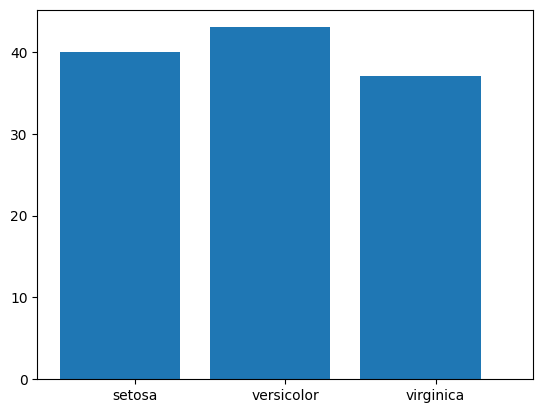

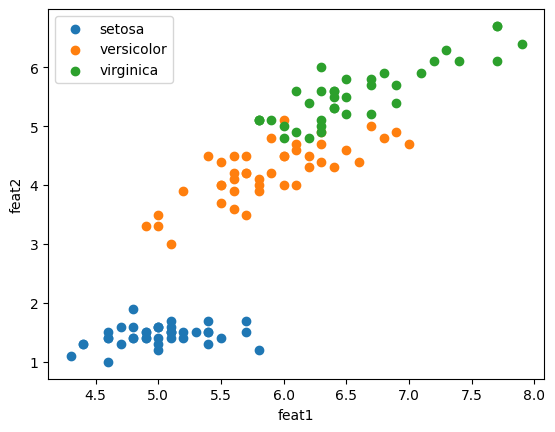

In [28]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)

bins = range(len(outputNames) + 1)
plt.hist(trainOutputs, bins, width = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins) + bin_w / 2, max(bins), bin_w), outputNames)
plt.show()

data2FeaturesMoreClasses(trainInputs, trainOutputs)

trainInputs, testInputs = normalisation(trainInputs, testInputs)

In [29]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5,), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

classifier.fit(trainInputs, trainOutputs)

Iteration 1, loss = 0.89050498
Iteration 2, loss = 0.79020695
Iteration 3, loss = 0.70261682
Iteration 4, loss = 0.63795055
Iteration 5, loss = 0.59294737
Iteration 6, loss = 0.55980303
Iteration 7, loss = 0.53299519
Iteration 8, loss = 0.50913765
Iteration 9, loss = 0.48668042
Iteration 10, loss = 0.46438364
Iteration 11, loss = 0.44226943
Iteration 12, loss = 0.42161313
Iteration 13, loss = 0.40252943
Iteration 14, loss = 0.38534053
Iteration 15, loss = 0.37002397
Iteration 16, loss = 0.35631526
Iteration 17, loss = 0.34377371
Iteration 18, loss = 0.33211015
Iteration 19, loss = 0.32117627
Iteration 20, loss = 0.31100910
Iteration 21, loss = 0.30165144
Iteration 22, loss = 0.29309232
Iteration 23, loss = 0.28528781
Iteration 24, loss = 0.27814662
Iteration 25, loss = 0.27156702
Iteration 26, loss = 0.26545860
Iteration 27, loss = 0.25974428
Iteration 28, loss = 0.25437110
Iteration 29, loss = 0.24930393
Iteration 30, loss = 0.24408987
Iteration 31, loss = 0.23811077
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(5,), learning_rate_init=0.1, max_iter=100,
              random_state=1, solver='sgd', verbose=10)

In [30]:
predictedLabels = classifier.predict(testInputs)

In [31]:
def plotConfusionMatrix(cm, classNames, title):
  classes = classNames
  plt.figure()
  plt.imshow(cm, interpolation = 'nearest', cmap = 'Blues')
  plt.title('Confusion Matrix ' + title)
  plt.colorbar()
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)

  text_format = 'd'
  thresh = cm.max() / 2.
  for row, column in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(column, row, format(cm[row, column], text_format),
             horizontalalignment = 'center',
             color = 'white' if cm[row, column] > thresh else 'black')

  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

  plt.show()

def evalMultiClass(realLabels, computedLabels, labelNames):
  confMatrix = confusion_matrix(realLabels, computedLabels)
  acc = sum([confMatrix[i][i] for i in range(len(labelNames))]) / len(realLabels)
  precision = {}
  recall = {}
  for i in range(len(labelNames)):
    precision[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[j][i] for j in range(len(labelNames))])
    recall[labelNames[i]] = confMatrix[i][i] / sum([confMatrix[i][j] for j in range(len(labelNames))])
  return acc, precision, recall, confMatrix

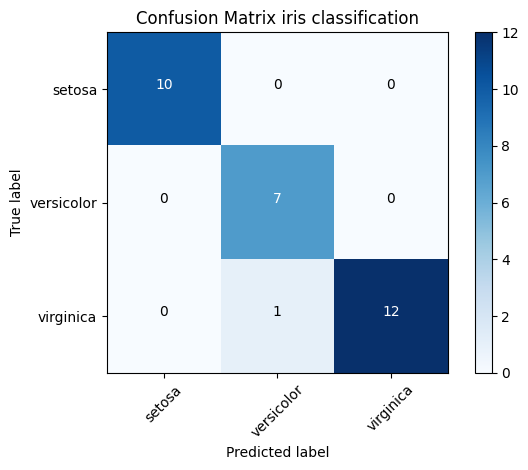

acc:  0.9666666666666667
precision:  {'setosa': 1.0, 'versicolor': 0.875, 'virginica': 1.0}
recall:  {'setosa': 1.0, 'versicolor': 1.0, 'virginica': 0.9230769230769231}


In [32]:
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)
plotConfusionMatrix(cm, outputNames, 'iris classification')

print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

2. devoltarea, antrenarea si testarea unui clasificator bazat pe retele neuronale folosind date mai complexe, de tip imagine - de ex baza de date cu cifre, pentru fiecare exmplu considerandu-se matricea de pixeli) - lucky you! Go to DEMO! 🍀

In [33]:
from sklearn.datasets import load_digits

In [34]:
def loadDigitData():
  data = load_digits()
  inputs = data.images
  outputs = data['target']
  outputNames = data['target_names']

  noData = len(inputs)
  permutation = np.random.permutation(noData)
  inputs = inputs[permutation]
  outputs = outputs[permutation]

  return inputs, outputs, outputNames

inputs, outputs, outputNames = loadDigitData()
print('out names: ', outputNames)
print('ins: ', inputs[:5])
print('outs: ', outputs[:5])

out names:  [0 1 2 3 4 5 6 7 8 9]
ins:  [[[ 0.  0.  0.  3. 15. 10.  1.  0.]
  [ 0.  0.  0. 11. 10. 16.  4.  0.]
  [ 0.  0.  0. 12.  1. 15.  6.  0.]
  [ 0.  0.  0.  3.  4. 15.  4.  0.]
  [ 0.  0.  0.  6. 15.  6.  0.  0.]
  [ 0.  4. 15. 16.  9.  0.  0.  0.]
  [ 0.  0. 13. 16. 15.  9.  3.  0.]
  [ 0.  0.  0.  4.  9. 14.  7.  0.]]

 [[ 0.  0.  3. 15. 13.  2.  0.  0.]
  [ 0.  0. 10. 16. 12. 13.  0.  0.]
  [ 0.  0. 13. 13.  9. 14.  0.  0.]
  [ 0.  0.  6. 15. 15. 11.  0.  0.]
  [ 0.  0.  4. 16. 14.  1.  0.  0.]
  [ 0.  0. 11. 14. 15.  5.  0.  0.]
  [ 0.  0.  9. 10. 14.  9.  0.  0.]
  [ 0.  0.  4. 16. 15.  2.  0.  0.]]

 [[ 0.  4. 15. 14. 11.  2.  0.  0.]
  [ 0.  7. 10.  1. 11. 11.  0.  0.]
  [ 0.  1. 13.  4. 13. 16.  2.  0.]
  [ 0.  0.  3. 11.  7.  9.  6.  0.]
  [ 0.  0.  0.  0.  0.  5.  8.  0.]
  [ 0.  0.  0.  0.  0.  5.  8.  0.]
  [ 0.  3. 12.  0.  3. 13.  5.  0.]
  [ 0.  2. 13. 16. 16.  8.  0.  0.]]

 [[ 0.  0.  1.  9. 16. 16. 16.  1.]
  [ 0.  0.  8. 15. 10. 14. 13.  0.]
  [ 0.  0. 14.  6.

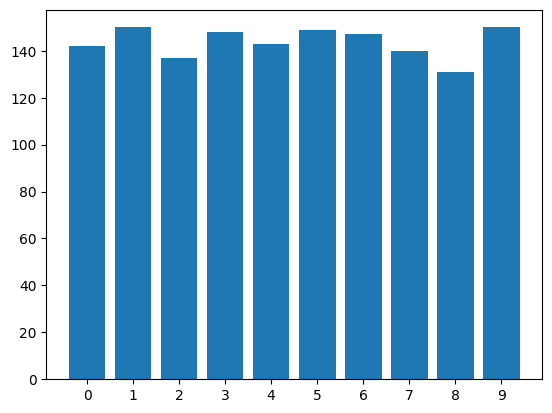

In [35]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)
bins = range(len(outputNames) + 1)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins) + bin_w / 2, max(bins), bin_w), outputNames)
plt.show()

def flatten(mat):
  x = []
  for line in mat:
    for el in line:
      x.append(el)
  return x

trainInputsFlatten = [flatten(el) for el in trainInputs]
testInputsFlatten = [flatten(el) for el in testInputs]
trainInputsNormalised, testInputsNormalised = normalisation(trainInputsFlatten, testInputsFlatten)

Iteration 1, loss = 2.27810622
Iteration 2, loss = 1.54692777
Iteration 3, loss = 1.05670217
Iteration 4, loss = 0.77847832
Iteration 5, loss = 0.60717452
Iteration 6, loss = 0.47901016
Iteration 7, loss = 0.40583374
Iteration 8, loss = 0.36827667
Iteration 9, loss = 0.32538813
Iteration 10, loss = 0.30243395
Iteration 11, loss = 0.27884433
Iteration 12, loss = 0.25800418
Iteration 13, loss = 0.24334742
Iteration 14, loss = 0.22764030
Iteration 15, loss = 0.21440147
Iteration 16, loss = 0.20150454
Iteration 17, loss = 0.19222273
Iteration 18, loss = 0.18401795
Iteration 19, loss = 0.17212980
Iteration 20, loss = 0.16978750
Iteration 21, loss = 0.16947651
Iteration 22, loss = 0.15838433
Iteration 23, loss = 0.15174972
Iteration 24, loss = 0.14801898
Iteration 25, loss = 0.14762747
Iteration 26, loss = 0.14132400
Iteration 27, loss = 0.13818281
Iteration 28, loss = 0.12827350
Iteration 29, loss = 0.12406738
Iteration 30, loss = 0.12202021
Iteration 31, loss = 0.11743061
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


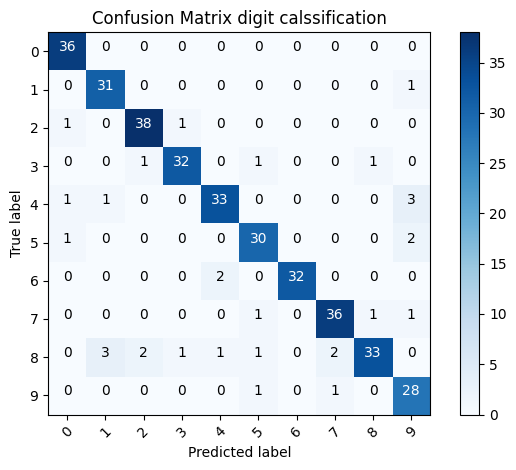

acc:  0.9138888888888889
precision:  {0: 0.9230769230769231, 1: 0.8857142857142857, 2: 0.926829268292683, 3: 0.9411764705882353, 4: 0.9166666666666666, 5: 0.8823529411764706, 6: 1.0, 7: 0.9230769230769231, 8: 0.9428571428571428, 9: 0.8}
recall:  {0: 1.0, 1: 0.96875, 2: 0.95, 3: 0.9142857142857143, 4: 0.868421052631579, 5: 0.9090909090909091, 6: 0.9411764705882353, 7: 0.9230769230769231, 8: 0.7674418604651163, 9: 0.9333333333333333}


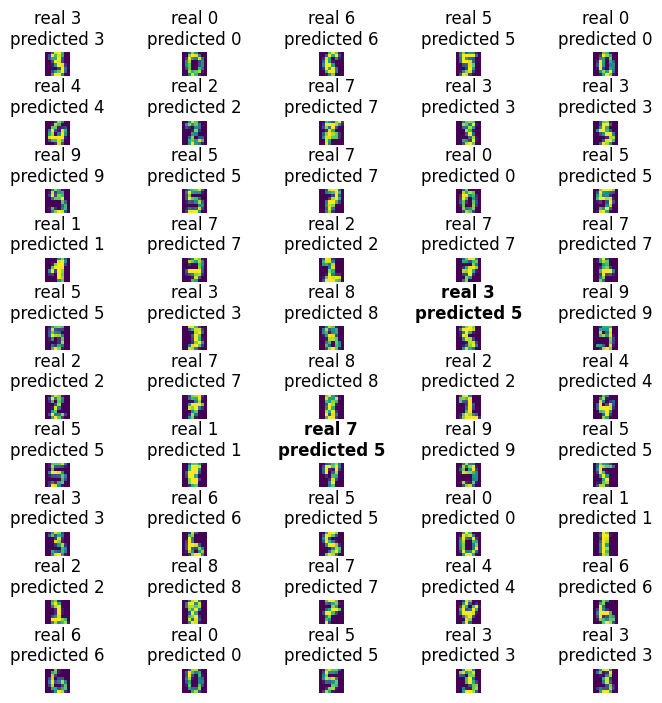

In [36]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(5, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=.1)

classifier.fit(trainInputsNormalised, trainOutputs)

predictedLabels = classifier.predict(testInputsNormalised)
acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, outputNames)

plotConfusionMatrix(cm, outputNames, "digit calssification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

n = 10
m = 5
fig, axes = plt.subplots(n , m, figsize = (7, 7))
fig.tight_layout()
for i in range(0, n):
  for j in range(0, m):
    axes[i][j].imshow(testInputs[m * i + j])
    if (testOutputs[m * i + j] == predictedLabels[m * i + j]):
      font = 'normal'
    else:
      font = 'bold'
    axes[i][j].set_title('real ' + str(testOutputs[m * i + j]) + '\npredicted ' + str(predictedLabels[m * i + j]), fontweight=font)
    axes[i][j].set_axis_off()

plt.show()

3. crearea unei baze cu imagini (cu si fara filtru sepia) si etichetele corespunzatoare - Let’s get down to business! 🚀

In [37]:
from PIL import Image
import os
import random

In [38]:
def loadImages(folderPath):
  images = []
  for filename in os.listdir(folderPath):
    imgPath = os.path.join(folderPath, filename)
    image = Image.open(imgPath)
    imageArray = np.array(image)
    images.append(imageArray)
  return images

In [39]:
def filterSepia(img):
  img = img.astype(float)
  sepiaFilter = np.array([[0.393, 0.769, 0.189],
                          [0.349, 0.686, 0.168],
                          [0.272, 0.534, 0.131]])
  sepiaImg = img @ sepiaFilter.T
  sepiaImg = np.clip(sepiaImg, 0, 255)
  return sepiaImg.astype(np.uint8)

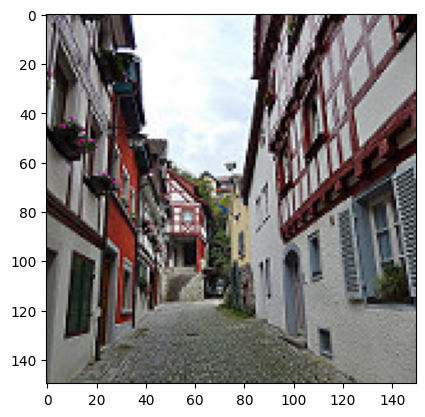

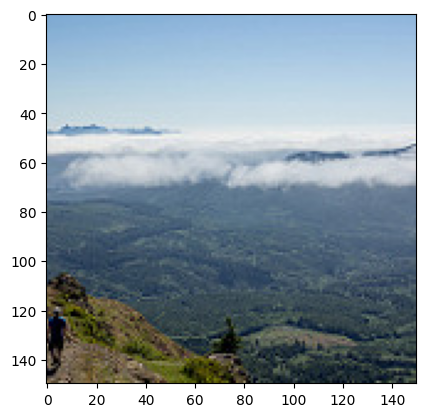

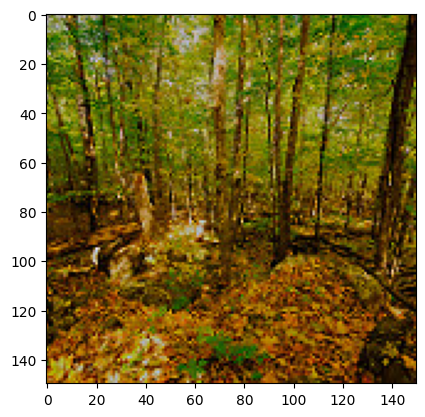

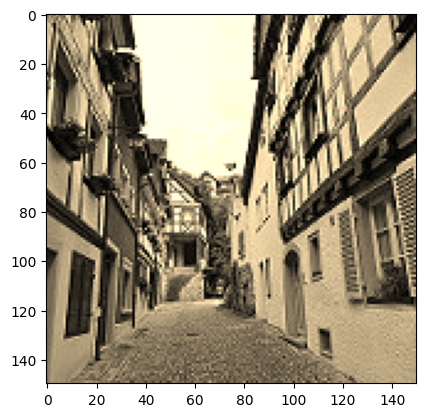

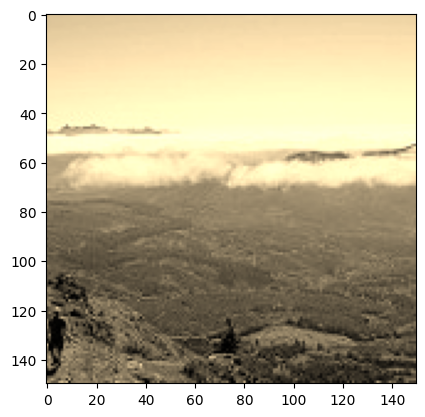

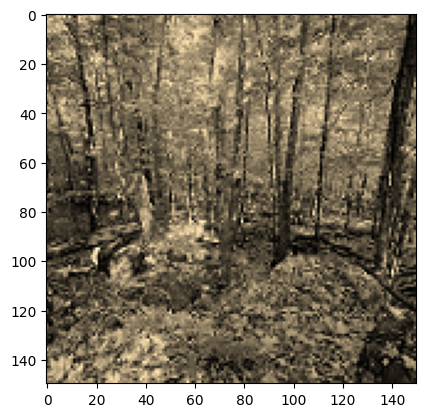

In [40]:
inputs = loadImages('images')
for img in inputs[:3]:
  #print(img.shape)
  plt.imshow(img)
  plt.show()

for img in inputs[:3]:
  img = filterSepia(img)
  plt.imshow(img)
  plt.show()

In [41]:
np.random.seed(0)
outputs = [random.choice([0, 1]) for _ in range(len(inputs))]
print(outputs)

[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1]


[[[ 62  62  72]
  [115 112 133]
  [106  99 117]
  ...
  [  2   1   0]
  [ 14  14  14]
  [  4   0   1]]

 [[ 91  90  96]
  [132 129 146]
  [100  93 111]
  ...
  [  7   9   8]
  [  6   4   5]
  [ 15   6   7]]

 [[122 123 118]
  [125 121 135]
  [132 128 145]
  ...
  [  8  10   9]
  [  4   0   0]
  [ 29  14  17]]

 ...

 [[ 93  95  90]
  [116 117 112]
  [132 133 128]
  ...
  [135 136 131]
  [139 140 135]
  [139 140 135]]

 [[ 91  94  87]
  [117 119 114]
  [131 132 127]
  ...
  [136 137 132]
  [133 134 129]
  [133 134 129]]

 [[ 89  92  85]
  [117 120 113]
  [127 129 124]
  ...
  [154 155 150]
  [130 131 126]
  [140 141 136]]]


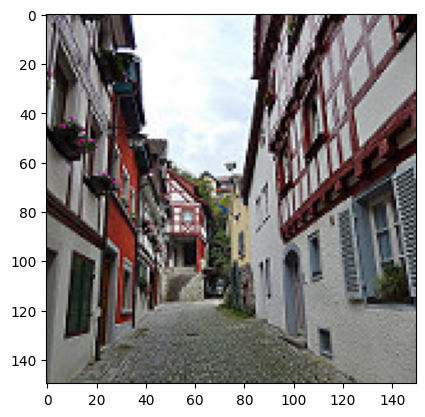

[[[215 191 149]
  [216 192 150]
  [218 194 151]
  ...
  [234 208 162]
  [234 208 162]
  [234 208 162]]

 [[218 194 151]
  [219 195 152]
  [220 196 153]
  ...
  [236 211 164]
  [236 211 164]
  [236 211 164]]

 [[219 195 152]
  [221 196 153]
  [222 198 154]
  ...
  [239 213 165]
  [239 213 165]
  [239 213 165]]

 ...

 [[ 80  72  56]
  [ 89  79  61]
  [102  91  71]
  ...
  [ 75  67  52]
  [ 78  69  54]
  [ 84  74  58]]

 [[107  95  74]
  [142 127  99]
  [188 167 130]
  ...
  [121 107  84]
  [125 111  86]
  [131 116  91]]

 [[174 155 121]
  [152 135 105]
  [109  97  75]
  ...
  [ 68  61  47]
  [ 73  65  51]
  [ 63  56  43]]]


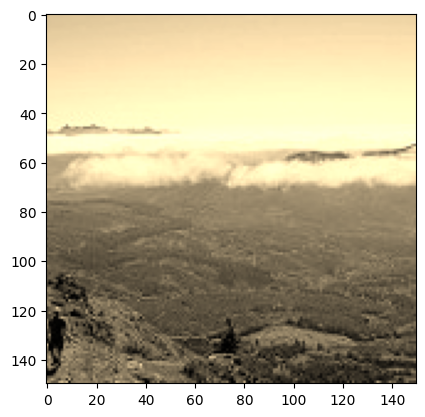

[[[116 103  80]
  [175 156 122]
  [ 73  65  50]
  ...
  [  4   3   2]
  [ 39  34  27]
  [ 14  12   9]]

 [[213 190 148]
  [135 120  93]
  [149 132 103]
  ...
  [  2   2   1]
  [ 51  45  35]
  [ 31  28  21]]

 [[174 155 120]
  [241 215 167]
  [232 206 161]
  ...
  [  7   7   5]
  [ 68  61  47]
  [ 41  36  28]]

 ...

 [[143 127  99]
  [111  98  76]
  [111  99  77]
  ...
  [ 11  10   7]
  [ 47  42  32]
  [ 72  64  50]]

 [[141 126  98]
  [190 169 132]
  [167 149 116]
  ...
  [ 14  13  10]
  [ 53  47  36]
  [ 17  15  11]]

 [[142 126  98]
  [133 118  92]
  [121 108  84]
  ...
  [ 47  42  32]
  [ 38  33  26]
  [ 31  28  21]]]


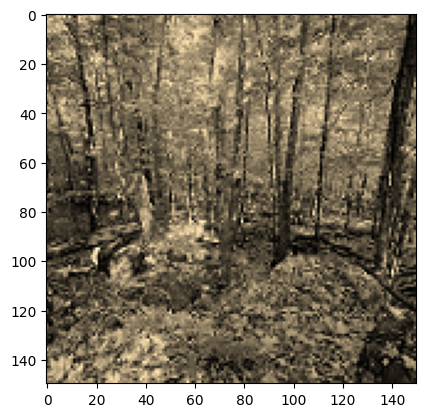

In [42]:
for i in range(len(inputs)):
  if outputs[i] == 1:
    inputs[i] = (filterSepia(inputs[i]))

for img in inputs[:3]:
  print(img)
  plt.imshow(img)
  plt.show()

In [43]:
def flattenImage(img):
  x = []
  for mat in img:
    for row in mat:
      for el in row:
        x.append(el)
  return x

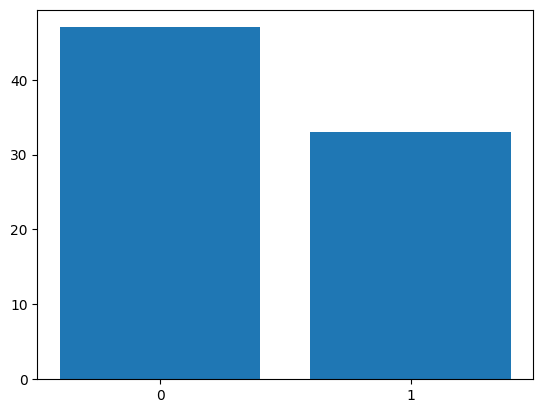

In [44]:
trainInputs, trainOutputs, testInputs, testOutputs = splitData(inputs, outputs)

bins = range(3)
plt.hist(trainOutputs, bins, rwidth = 0.8)
bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), [0, 1])
plt.show()

trainInputsNormalised = np.array([np.array(flattenImage(el)) / 255.0 for el in trainInputs])
testInputsNormalised = np.array([np.array(flattenImage(el)) / 255.0 for el in testInputs])

scaler = StandardScaler()

trainInputsScaled = scaler.fit_transform(trainInputsNormalised)
testInputsScaled = scaler.transform(testInputsNormalised)

In [45]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(50, ), activation='tanh', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=0.01)

classifier.fit(trainInputsScaled, trainOutputs)

Iteration 1, loss = 0.79249242
Iteration 2, loss = 0.42389747
Iteration 3, loss = 0.28839361
Iteration 4, loss = 0.18339402
Iteration 5, loss = 0.14781367
Iteration 6, loss = 0.12670194
Iteration 7, loss = 0.11829941
Iteration 8, loss = 0.10990423
Iteration 9, loss = 0.10425753
Iteration 10, loss = 0.09989072
Iteration 11, loss = 0.09675043
Iteration 12, loss = 0.09377133
Iteration 13, loss = 0.09114446
Iteration 14, loss = 0.08858998
Iteration 15, loss = 0.08664990
Iteration 16, loss = 0.08470695
Iteration 17, loss = 0.08269861
Iteration 18, loss = 0.08080345
Iteration 19, loss = 0.07896201
Iteration 20, loss = 0.07707928
Iteration 21, loss = 0.07508002
Iteration 22, loss = 0.07285198
Iteration 23, loss = 0.07099537
Iteration 24, loss = 0.06936876
Iteration 25, loss = 0.06767540
Iteration 26, loss = 0.06587925
Iteration 27, loss = 0.06404888
Iteration 28, loss = 0.06227751
Iteration 29, loss = 0.06063542
Iteration 30, loss = 0.05905432
Iteration 31, loss = 0.05743544
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate_init=0.01, max_iter=100, random_state=1,
              solver='sgd', verbose=10)

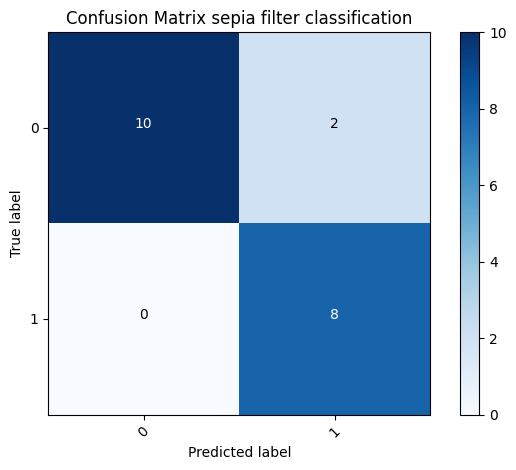

acc:  0.9
precision:  {0: 1.0, 1: 0.8}
recall:  {0: 0.8333333333333334, 1: 1.0}


In [46]:
predictedLabels = classifier.predict(testInputsScaled)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

In [47]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(50, ), activation='relu', max_iter=100, solver='sgd', verbose=10, random_state=1, learning_rate_init=0.01)

classifier.fit(trainInputsScaled, trainOutputs)

Iteration 1, loss = 0.79157412
Iteration 2, loss = 0.87285360
Iteration 3, loss = 1.40496322
Iteration 4, loss = 0.48083363
Iteration 5, loss = 0.03088722
Iteration 6, loss = 0.01674505
Iteration 7, loss = 0.00072902
Iteration 8, loss = 0.00065332
Iteration 9, loss = 0.00066075
Iteration 10, loss = 0.00062257
Iteration 11, loss = 0.00055160
Iteration 12, loss = 0.00047507
Iteration 13, loss = 0.00041091
Iteration 14, loss = 0.00036138
Iteration 15, loss = 0.00032493
Iteration 16, loss = 0.00029534
Iteration 17, loss = 0.00027016
Iteration 18, loss = 0.00024790
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=100,
              random_state=1, solver='sgd', verbose=10)

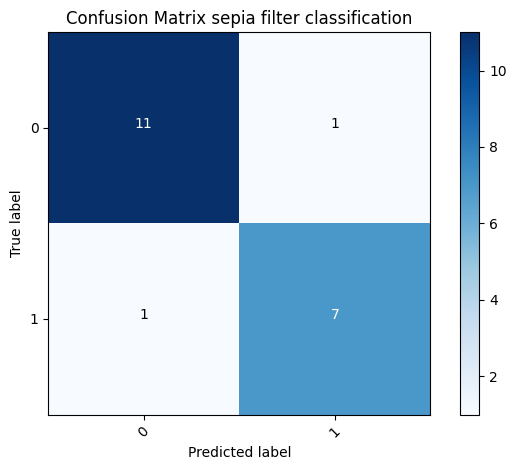

acc:  0.9
precision:  {0: 0.9166666666666666, 1: 0.875}
recall:  {0: 0.9166666666666666, 1: 0.875}


In [48]:
predictedLabels = classifier.predict(testInputsScaled)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)

In [49]:
classifier = neural_network.MLPClassifier(hidden_layer_sizes=(50, ), activation='tanh', max_iter=100, solver='adam', verbose=10, random_state=1, learning_rate_init=0.01)

classifier.fit(trainInputsScaled, trainOutputs)

Iteration 1, loss = 0.79249242
Iteration 2, loss = 0.53892130
Iteration 3, loss = 0.48033896
Iteration 4, loss = 0.45077912
Iteration 5, loss = 0.42471683
Iteration 6, loss = 0.40032280
Iteration 7, loss = 0.37872602
Iteration 8, loss = 0.35958489
Iteration 9, loss = 0.34408852
Iteration 10, loss = 0.33249069
Iteration 11, loss = 0.32570110
Iteration 12, loss = 0.32267019
Iteration 13, loss = 0.32298201
Iteration 14, loss = 0.32469793
Iteration 15, loss = 0.32580496
Iteration 16, loss = 0.32401519
Iteration 17, loss = 0.32118663
Iteration 18, loss = 0.31675055
Iteration 19, loss = 0.30937831
Iteration 20, loss = 0.30174762
Iteration 21, loss = 0.29503037
Iteration 22, loss = 0.28869972
Iteration 23, loss = 0.28315696
Iteration 24, loss = 0.27863585
Iteration 25, loss = 0.27497747
Iteration 26, loss = 0.27212117
Iteration 27, loss = 0.26974626
Iteration 28, loss = 0.26759561
Iteration 29, loss = 0.26544675
Iteration 30, loss = 0.26313844
Iteration 31, loss = 0.26058084
Iteration 32, los

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=(50,),
              learning_rate_init=0.01, max_iter=100, random_state=1,
              verbose=10)

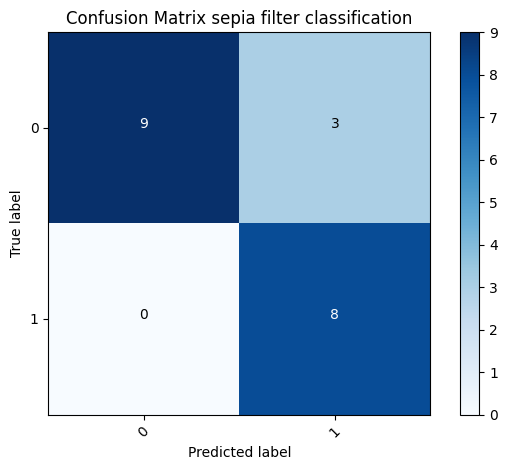

acc:  0.85
precision:  {0: 1.0, 1: 0.7272727272727273}
recall:  {0: 0.75, 1: 1.0}


In [50]:
predictedLabels = classifier.predict(testInputsScaled)

acc, prec, recall, cm = evalMultiClass(np.array(testOutputs), predictedLabels, [0, 1])


plotConfusionMatrix(cm, [0, 1], "sepia filter classification")
print('acc: ', acc)
print('precision: ', prec)
print('recall: ', recall)